Best Parameters: {'n_neighbors': 29, 'weights': 'distance'}
ROC-AUC Score: 0.7890729107176851
Log Loss: 0.5207964450613328
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.89      0.83       103
           1       0.69      0.47      0.56        51

    accuracy                           0.75       154
   macro avg       0.73      0.68      0.69       154
weighted avg       0.74      0.75      0.74       154



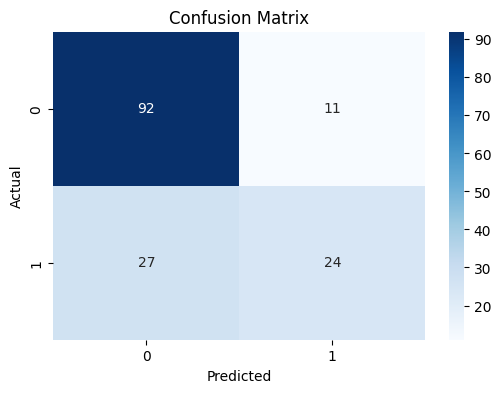

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, log_loss, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv('diabetes.csv')

# Splitting features & target
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Hyperparameter tuning for best K
param_grid = {'n_neighbors': range(1, 30, 2), 'weights': ['uniform', 'distance']}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Best model from GridSearch
best_knn = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)

# Predictions
y_pred = best_knn.predict(X_test)
y_pred_proba = best_knn.predict_proba(X_test)[:, 1]  # Get probabilities
#Evaluation
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))
print("Log Loss:", log_loss(y_test, y_pred_proba))
print("Classification Report:\n", classification_report(y_test, y_pred))

# **Confusion Matrix**
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
